# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

# IMPORTING DATA 

In [2]:
df = pd.read_csv('/root/Desktop/bigmart_sales.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# CHECKING NULL VALUES

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# TREATING THE MISSING VALUES

In [5]:
df["Item_Weight"].mean()

12.857645184135976

In [6]:
df["Item_Weight"] = df["Item_Weight"].fillna(12.85)

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode().iloc[0],inplace=True)

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# CORRELATION BETWEEN THE COLUMNS

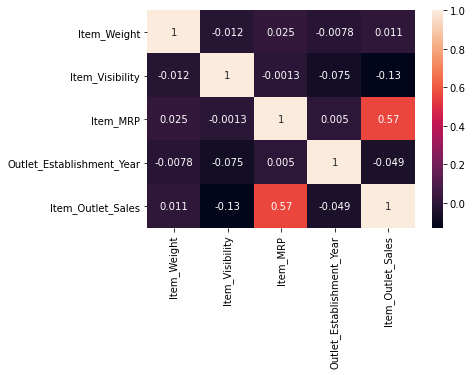

In [10]:
sns.heatmap(df.corr() , annot=True)
plt.show()

# CHECKING DATA TYPES AND IF DIFFERNT CONVERTING IT TO THE REQUIRED DATA TYPE

In [11]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [12]:
df.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [13]:
df['Item_Weight'] = df['Item_Weight'].astype(np.int64)

In [14]:
df['Item_MRP'] = df['Item_MRP'].astype(np.int64)

In [15]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(np.int64)

In [16]:
df.dtypes

Item_Identifier                int64
Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                       int64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales              int64
dtype: object

# CHECKIING OUTLIERS

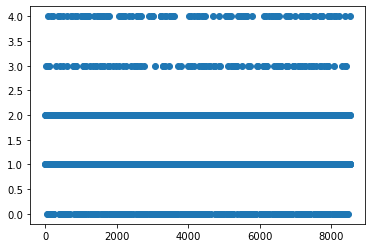

In [17]:
plt.scatter(df.index, df['Item_Fat_Content'])

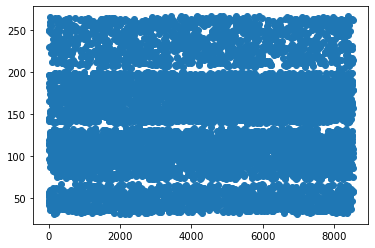

In [18]:
plt.scatter(df.index, df['Item_MRP'])

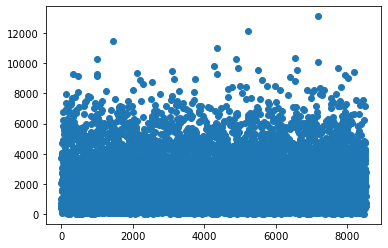

In [19]:
plt.scatter(df.index, df['Item_Outlet_Sales'])

# TREATING OUTLIERS

In [20]:
li = list(df['Item_Outlet_Sales'].sort_values()[-30:].index)

In [21]:
df['Item_Outlet_Sales'][li] = int(df.drop(li)['Item_Outlet_Sales'].mean())

<ipython-input-21-e6945a409cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Outlet_Sales'][li] = int(df.drop(li)['Item_Outlet_Sales'].mean())


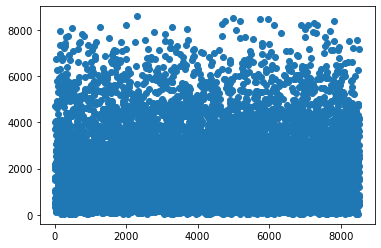

In [22]:
plt.scatter(df.index, df['Item_Outlet_Sales'])

In [23]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [24]:
df.values.shape

(8523, 12)

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# LOGISTIC REGRESSION

In [27]:
log.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/logistic.py:467: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  warnings.warn("Default multi_class will be changed to 'auto' in"


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred = log.predict(X_test)
pred

array([3111,  127, 1182, ...,  215, 3435,  335])

In [29]:
log.score(X_test, pred)

1.0

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
accuracy_score(y_test,pred)*100

0.9385999217833398

# SVM

In [32]:
from sklearn import svm
from sklearn.svm import SVC

In [33]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [35]:
model = SVC()
model.fit(X_train,y_train)
pred= model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/base.py:189: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


In [36]:
pred1 = model.predict(X_test)

In [37]:
print(confusion_matrix(y_test,pred1))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
print(classification_report(y_test,pred1)) 

              precision    recall  f1-score   support

          33       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         2
          45       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         2
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          59       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         4
          77       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/classification.py:1438: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  recall = _prf_divide(tp_sum, true_sum,


In [39]:
print("(in %):",accuracy_score(y_test, pred1)*100)

(in %): 0.27375831052014077


# GRID SEARCH

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [42]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:653: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.002, total=  55.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.005, total= 1.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.007, total= 1.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.002, total=  60.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.005, total= 1.6min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.007, total= 1.2min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.002, total= 1.2min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.005, total= 1.9min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.007, total= 1.4min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.002, total=  52.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.005, total= 1.4min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.007, total= 1.0min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.007, total=  56.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.011, total= 1.4min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.013, total= 1.1min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.025, total= 1.1min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 109.9min finished
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:810: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  warnings.warn("The default of the `iid` parameter will change "


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [44]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

          33       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         2
          45       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         2
          48       0.00      0.00      0.00         0
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         0
          59       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         0
          63       0.00      0.00      0.00         0
          67       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/classification.py:1438: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  recall = _prf_divide(tp_sum, true_sum,


In [45]:
print("(in %):",accuracy_score(y_test, grid_predictions)*1000)

(in %): 24.638247946812672


# NAIVE BAYES

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [47]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [49]:
gnb = GaussianNB() 

In [50]:
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
pred2 = gnb.predict(X_test)
pred2

array([ 612,  804, 2543, ..., 2535,  306,  306])

In [52]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, pred2)*100)

Gaussian Naive Bayes model accuracy(in %): 0.3128666405944466
